In [8]:
### Library Imports
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, calculate_cci, plot_function
from FilterFunctions import filter_indicators

In [9]:
### Load in Stock Data
tickers = ['CELH', 'LI', 'AMD', 'TSM', 'BA', 'PFE', 'STT', 'MSAI', 'WNS', 'TSLA', 'TNON', 'BTDR', 'RRGB', 'AVO', 'JPM', 'EL', 'CRDO', 'VC', 'BLK', 'APLD', 'LCID', 'ORCL', 'RUN', 'QS', 'CISS', 'ALLR', 'SCHW', 'TMO', 'ZM', 'NMRK', 'HD', 'PYPL', 'IBM', 'BABA', 'PINS', 'SPOT', 'XOM', 'CRSR', 'LMND', 'SE', 'JNJ', 'EXC', 'ABNB', 'ETSY', 'CVX', 'ACN', 'SNAP', 'NIO', 'SBUX', 'AAPL', 'MRO', 'CSCO', 'UPST', 'CRM', 'NKE', 'LYV', 'TDOC', 'ACRS', 'MCD', 'KO']
start_date = '2018-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data.tail(5)

[*********************100%%**********************]  60 of 60 completed


Price        Date       Close                                        \
Ticker                   AAPL        ABNB         ACN   ACRS   ALLR   
1590   2024-04-29  173.500000  162.250000  303.160004  1.220  1.380   
1591   2024-04-30  170.330002  158.570007  300.910004  1.210  1.270   
1592   2024-05-01  169.300003  156.160004  298.660004  1.260  1.370   
1593   2024-05-02  173.029999  158.330002  300.339996  1.310  1.230   
1594   2024-05-03         NaN  159.970001  304.470001  1.355  1.009   

Price                                          ...     Low                     \
Ticker         AMD   APLD     AVO          BA  ...    TDOC         TMO   TNON   
1590    160.199997  2.710  11.460  173.490005  ...  12.880  571.299988  0.730   
1591    158.380005  2.705  11.350  167.839996  ...  12.735  567.969971  0.722   
1592    144.270004  3.000  11.560  171.460007  ...  12.530  568.400024  0.760   
1593    146.160004  2.960  11.790  178.850006  ...  12.600  565.489990  0.760   
1594    150.618896  3.025  11.795  179.409897  ...  12.820  573.679993  0.825   

Price                                                                         \
Ticker        TSLA         TSM       UPST          VC        WNS         XOM   
1590    184.539993  135.910004  22.830000  111.059998  40.020000  117.760002   
1591    182.839996  137.259995  22.090000  110.070000  41.770000  117.980003   
1592    179.009995  133.210007  22.010000  110.629997  41.610001  115.660004   
1593    176.020004  133.220001  22.879999  113.330002  43.139999  115.900002   
1594    178.539993  138.759995  23.510000  113.389999  44.509998  114.129997   

Price              
Ticker         ZM  
1590    62.500000  
1591    60.889999  
1592    60.689999  
1593    61.799999  
1594    61.340000  

[5 rows x 181 columns]

In [10]:
### Function to Calculate CCI
cci_df, cci_vals = calculate_cci(stock_data, window = 14)
print(cci_df.tail(5))
#print("CCI values list: ", cci_vals)

Ticker        AAPL       ABNB        ACN        ACRS       ALLR        AMD  \
1590    111.800697  70.135165 -65.079038  -21.337928 -16.856765  10.429587   
1591     43.837703 -10.889738 -75.548131  -24.516347 -16.117858  19.208780   
1592     13.155636 -51.297570 -70.538144  126.431079 -13.143889 -67.904410   
1593     85.050463 -71.198114 -62.563841  203.624901  21.424871 -65.883433   
1594           NaN  49.258762 -40.684195  327.406220 -23.714549 -28.498290   

Ticker       APLD         AVO          BA        BABA  ...       TDOC  \
1590     6.228471   23.988536   13.686220  106.531080  ... -36.242899   
1591    -1.778884   -5.182841    2.652515   78.963781  ... -53.669033   
1592    39.005587   68.490970   15.495953   84.918533  ... -50.865858   
1593    50.892744  125.105948   76.067767  153.820888  ... -34.545987   
1594    58.841779  145.818553  102.953774  143.837072  ... -14.436551   

Ticker        TMO       TNON        TSLA        TSM       UPST          VC  \
1590    65.689

In [11]:
### Filter Function Call
filtered_df = filter_indicators(cci_df, 100, -100, cci_df.columns)
filtered_df.tail(5)

Tickers with potential BUY signals:
ACRS: 327.40622
AVO: 145.818553
BA: 102.953774
BABA: 143.837072
LCID: 148.617485
NIO: 145.318784
PFE: 152.261218
PINS: 195.750108
RUN: 106.558438
SNAP: 143.044548
VC: 101.982919

Tickers with potential SELL signals:
AAPL: nan
EL: -117.058905
ETSY: -236.021938
SBUX: -210.433653
XOM: -191.324263


Ticker,AAPL,ACRS,AVO,BA,BABA,EL,ETSY,LCID,NIO,PFE,PINS,RUN,SBUX,SNAP,VC,XOM
1590,111.800697,-21.337928,23.988536,13.686220,106.531080,61.861621,119.819261,7.276336,95.443942,-21.423093,50.692435,5.583424,45.720579,284.223558,72.544076,-41.704924
1591,43.837703,-24.516347,-5.182841,2.652515,78.963781,53.684727,118.221104,22.262058,100.455354,-17.689699,40.490112,-13.595190,42.502959,232.916779,29.005523,-57.982615
1592,13.155636,126.431079,68.490970,15.495953,84.918533,-173.225226,203.570917,65.105419,159.428070,107.029470,305.928680,-6.023746,-331.186715,206.022525,63.978490,-172.335049
1593,85.050463,203.624901,125.105948,76.067767,153.820888,-124.869231,-414.700211,120.815419,173.561066,160.458017,243.633594,22.945918,-258.267090,173.832228,108.164587,-166.823471
1594,NaN,327.406220,145.818553,102.953774,143.837072,-117.058905,-236.021938,148.617485,145.318784,152.261218,195.750108,106.558438,-210.433653,143.044548,101.982919,-191.324263


[*********************100%%**********************]  2 of 2 completed


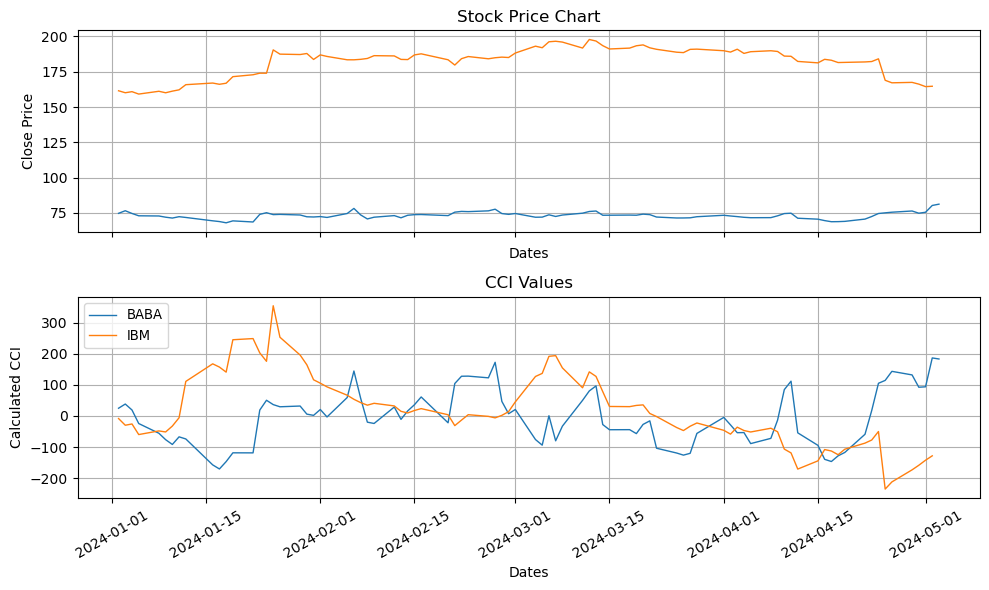

In [12]:
### Plot CCI for chosen ticker
# Create a list of tickers you want to plot
tickers_to_plot = ['BABA', 'IBM']
stock_data_to_plot = import_stock_data(tickers_to_plot, start_date)
cci_df_to_plot, cci_vals = calculate_cci(stock_data_to_plot, window = 20)

# Call plot_function with the correct arguments
plot = plot_function(stock_data_to_plot, cci_df_to_plot, tickers = tickers_to_plot, indicator_type = 'CCI')
plot